In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Supermarket_Customers_Finale.csv')
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,Complain,Response,Buyer,Cust_Age,TotalBought,TotalFamily,Class,TotPurch,DiscPer,DiscAcc
0,0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,...,0,1,1,58,1617,1,Middle,22,13.636364,Low Acceptance
1,1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,...,0,0,1,61,27,3,Middle,4,50.000000,Middle Acceptance
2,2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,...,0,0,2,50,776,2,Upper,20,5.000000,Low Acceptance
3,3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,...,0,0,2,31,53,3,Lower,6,33.333333,Middle Acceptance
4,4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,...,0,0,2,34,422,3,Middle,14,35.714286,Middle Acceptance


# RFM

RFM (Recency, Frequency, Monetary) is an analysis method used in marketing and customer management to identify and classify customers based on three main dimensions:

* Recency: Indicates how recent or how many times a customer has made a transaction. The more recent their last transaction, the higher the recency value.

* Frequency: Shows how often a customer makes transactions within a specific period. The more frequently they shop, the higher the frequency value.

* Monetary: Represents the total value of transactions generated by a customer within a specific period. The higher the transaction value, the higher the monetary value.

By using the RFM method, customers can be ranked based on the combination of their Recency, Frequency, and Monetary values. Based on this ranking, customers can be divided into different segments, such as:

* High-value customers: Customers who have high values in all three RFM dimensions. They are customers who recently made transactions, shop frequently, and spend a lot of money.

* Promising customers: Customers who may have recently made transactions and/or shop with good frequency, but haven't spent a lot of money yet.

* Sleeping customers: Customers who have not made transactions recently and/or have a low shopping frequency, even though they may have spent a lot of money in the past.

* Lost customers: Customers who were previously good customers but are no longer making transactions for a long period.

The RFM method is very useful in identifying sales improvement opportunities, customer retention, and developing more effective marketing strategies based on customer behavior characteristics.

# New Dataframe Specific for RFM's Feature

In [3]:
# Frequency
df['Frequency'] = df['NumCatalogPurchases'] + df['NumWebPurchases'] + df['NumStorePurchases']

# Monetary 
df['Monetary'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweet'] + df['Gold']

Because Recency column is already exist, we only need to add Frequency and Monetary feature/column. Frequency is an addition of total purchases in all places (wether it's from catalog, web, or store). Whereas Monetary is addition of total money spent on every item.

In [4]:
dfRFM = df[['ID','Recency','Frequency','Monetary']]

In [5]:
dfRFM

,ID,Recency,Frequency,Monetary
0,5524,58,22,1617
1,2174,38,4,27
2,4141,26,20,776
3,6182,26,6,53
4,5324,94,14,422
...,...,...,...,...
2228,10870,46,16,1341
2229,4001,56,15,444
2230,7270,91,18,1241
2231,8235,8,21,843


# Outliers Checking and Data Standardization

<Axes: >

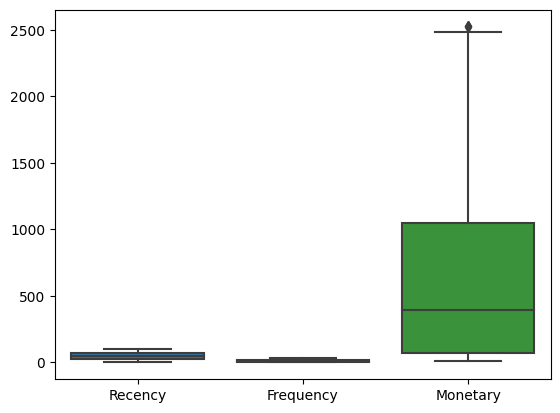

In [6]:
plt.figure()
sns.boxplot(dfRFM[['Recency','Frequency','Monetary']])

"K-means clustering can often perform better if the data is normalized or standardized. Normalization is the process of scaling the data to bring all features to a similar range, typically between 0 and 1, while standardization transforms the data to have zero mean and unit variance."

In [7]:
# Naming
scaler = StandardScaler()
dfRFM_normalized = dfRFM[['Recency','Frequency','Monetary']]

# Standardizing
dfRFM_normalized = scaler.fit_transform(dfRFM_normalized)
dfRFM_normalized = pd.DataFrame(dfRFM_normalized)
dfRFM_normalized.columns = ['Recency','Frequency','Monetary']
dfRFM_normalized

,Recency,Frequency,Monetary
0,0.307726,1.312212,1.676223
1,-0.382637,-1.194111,-0.964149
2,-0.796855,1.033732,0.279649
3,-0.796855,-0.915630,-0.920973
4,1.550381,0.198291,-0.308207
...,...,...,...
2228,-0.106492,0.476771,1.217895
2229,0.238690,0.337531,-0.271674
2230,1.446826,0.755252,1.051833
2231,-1.418182,1.172972,0.390910


<Axes: >

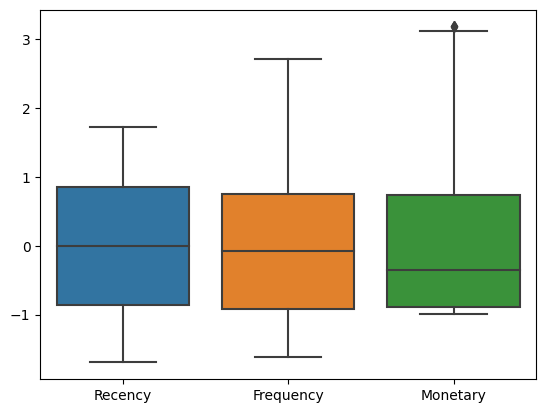

In [8]:
sns.boxplot(dfRFM_normalized[['Recency','Frequency','Monetary']])

# KMeans Clustering

K-means clustering is a popular unsupervised machine learning algorithm used for clustering or grouping similar data points together in a dataset. The goal of K-means is to partition the data into K clusters, where each cluster is represented by its centroid (the mean of the data points in the cluster). It is commonly used for clustering data into distinct groups based on similarity.

Here's how the K-means algorithm works:

* Initialization: Randomly select K data points from the dataset as initial cluster centroids.

* Assignment: Assign each data point to the nearest cluster centroid based on the Euclidean distance or other distance metrics.

* Update: Recalculate the cluster centroids by taking the mean of all data points assigned to each cluster.

* Iteration: Repeat the assignment and update steps until convergence (when the cluster centroids stabilize or a predefined number of iterations is reached).

* Final Result: Once the algorithm converges, the data points are partitioned into K clusters, and each cluster is represented by its centroid.

## Elbow Plot

The elbow plot, also known as the scree plot, is a graphical tool used in unsupervised machine learning, particularly in clustering algorithms like K-means. It helps to determine the optimal number of clusters (K) for a given dataset.

In the elbow plot, the x-axis represents the number of clusters (K), and the y-axis represents a performance metric, typically the sum of squared distances (inertia) of data points to their assigned cluster centers. The inertia measures how well the data points are clustered within their respective clusters. Lower inertia values indicate more compact and well-separated clusters.

As you increase the number of clusters (K), the inertia usually decreases because smaller clusters can better fit the data points. However, at a certain point, adding more clusters leads to diminishing returns in reducing inertia. The plot typically forms an "elbow" shape, where the inertia decreases sharply at first and then levels off as K increases.

The optimal number of clusters is often located at the "elbow" point on the plot. It represents a good balance between the complexity (number of clusters) and the quality of clustering. Choosing the elbow point as the number of clusters can provide a reasonable trade-off between having enough clusters to capture meaningful patterns in the data while avoiding excessive fragmentation.

In [9]:
elb = []
n_clus = range(2,11)

for i in n_clus:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(dfRFM_normalized)
    
    elb.append(kmeans.inertia_)

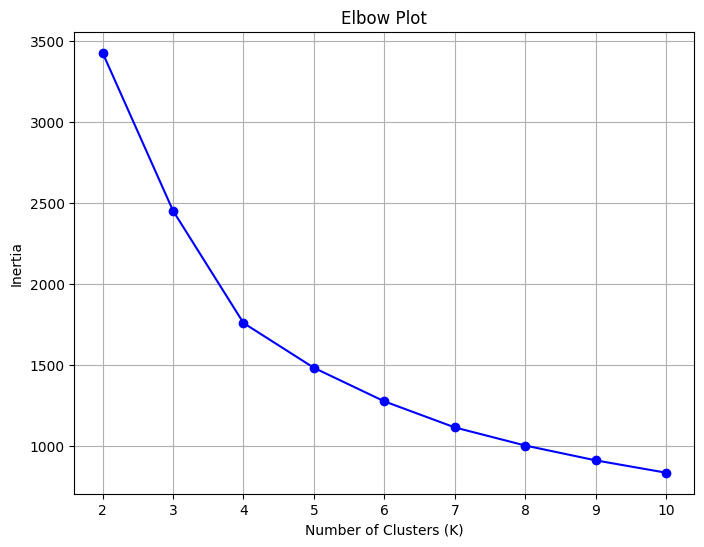

In [10]:
# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(n_clus, elb, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.xticks(n_clus)
plt.grid(True)
plt.show()

## Shilhouette Score

The silhouette score is a metric used to evaluate the quality of clustering in unsupervised machine learning. It measures how well-defined and separated the clusters are in the data. The silhouette score ranges from -1 to 1, where:

* A silhouette score close to +1 indicates that data points are well-clustered, with each point being closer to its own cluster than to other clusters.

* A silhouette score close to 0 indicates overlapping clusters or clusters with similar distances between data points.

* A silhouette score close to -1 indicates that data points might have been assigned to the wrong clusters.

In [11]:
elb = []
n_clus = range(2,11)

for i in n_clus:
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(dfRFM_normalized)
    
    cluster_labels = kmeans.labels_

    # silhouettescore
    ss_avg = silhouette_score(dfRFM_normalized,cluster_labels)
    print("n_cluster={0}, silhouette score={1}".format(i,ss_avg))

n_cluster=2, silhouette score=0.437139671684178
n_cluster=3, silhouette score=0.39515919788515186
n_cluster=4, silhouette score=0.3946022109921589
n_cluster=5, silhouette score=0.3848696041635418
n_cluster=6, silhouette score=0.36954011960674393
n_cluster=7, silhouette score=0.3521529740423454
n_cluster=8, silhouette score=0.3533364147143573
n_cluster=9, silhouette score=0.3538758589328077
n_cluster=10, silhouette score=0.35669486617848173


## Finalize KMeans

In [12]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(dfRFM_normalized)

KMeans(max_iter=50, n_clusters=4)

## Plotting

In [13]:
dfRFM_normalized['ID'] = dfRFM['ID']
dfRFM_normalized['Cluster'] = kmeans.labels_
dfRFM_normalized.head()

,Recency,Frequency,Monetary,ID,Cluster
0,0.307726,1.312212,1.676223,5524,1
1,-0.382637,-1.194111,-0.964149,2174,0
2,-0.796855,1.033732,0.279649,4141,3
3,-0.796855,-0.915630,-0.920973,6182,0
4,1.550381,0.198291,-0.308207,5324,2


In [14]:
dfRFM_normalized['Cluster'].value_counts()

Cluster
0    640
2    603
1    524
3    466
Name: count, dtype: int64

## Visualization

Text(0.5, 0, 'Monetary')

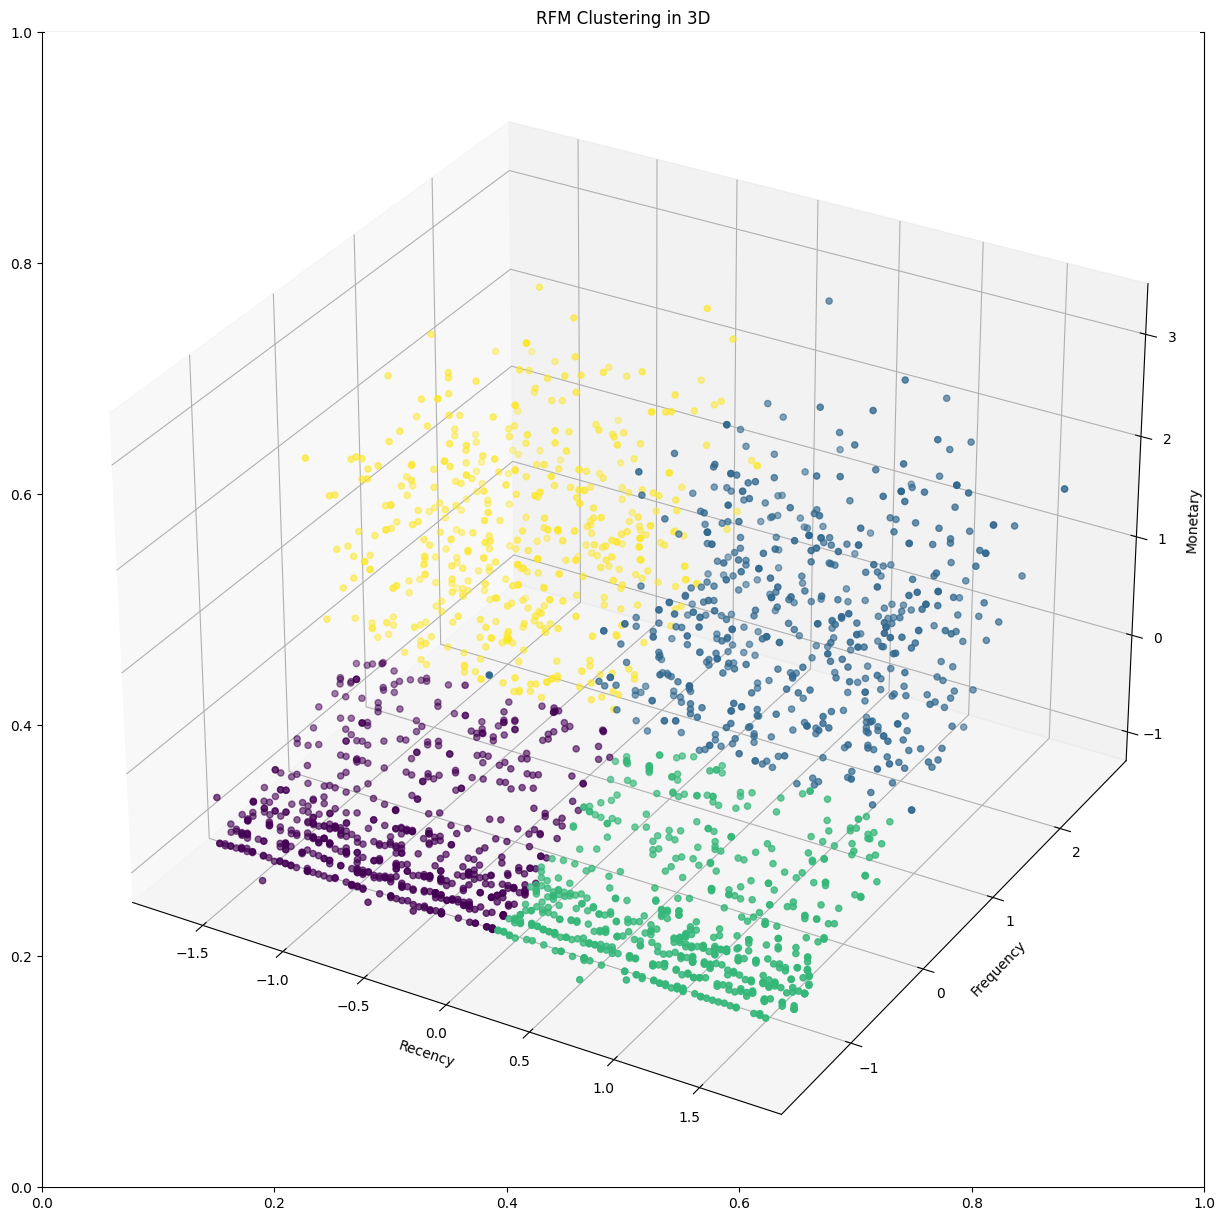

In [15]:
plt.rcParams['figure.figsize'] = (15, 15)

plt.title('RFM Clustering in 3D')
ax = plt.axes(projection='3d')
ax.scatter3D(dfRFM_normalized['Recency'], 
             dfRFM_normalized['Frequency'],
             dfRFM_normalized['Monetary'],
             c= dfRFM_normalized['Cluster'])

# Vector Labeling
ax.set_xlabel('Recency', size=10)
ax.set_ylabel('Frequency', size=10)
ax.set_zlabel('Monetary', size=10)

<Axes: title={'center': 'Recency vs Frequency'}, xlabel='Recency', ylabel='Frequency'>

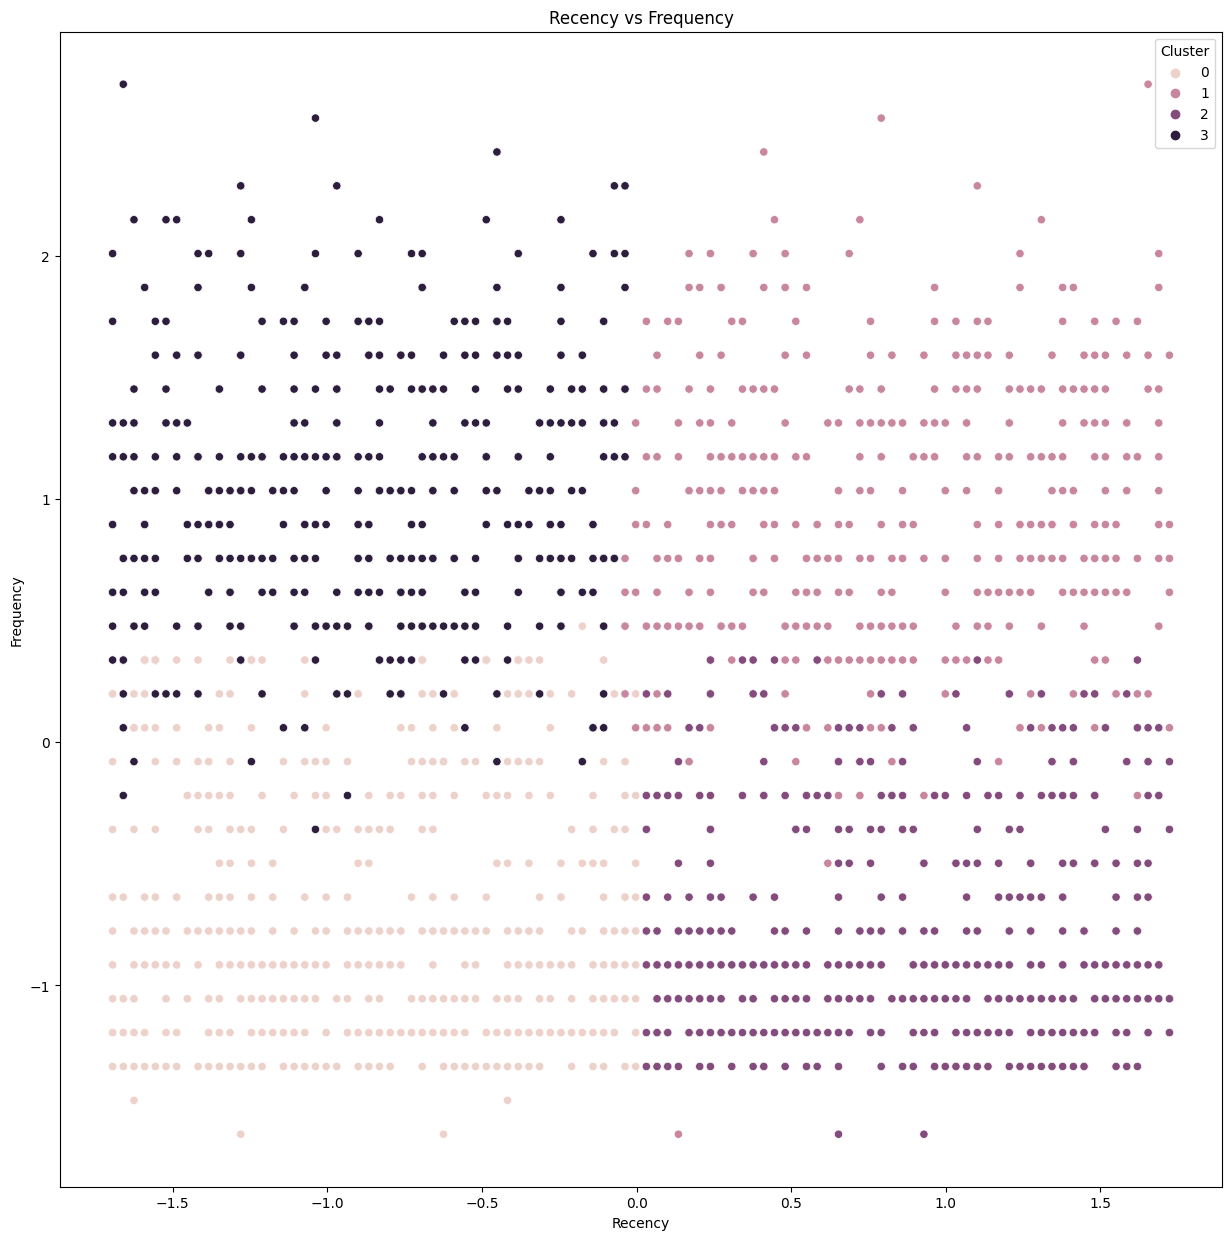

In [16]:
plt.title('Recency vs Frequency')
sns.scatterplot(x=dfRFM_normalized['Recency'],y=dfRFM_normalized['Frequency'],hue=dfRFM_normalized['Cluster'])

<Axes: title={'center': 'Frequency vs Monetary'}, xlabel='Monetary', ylabel='Frequency'>

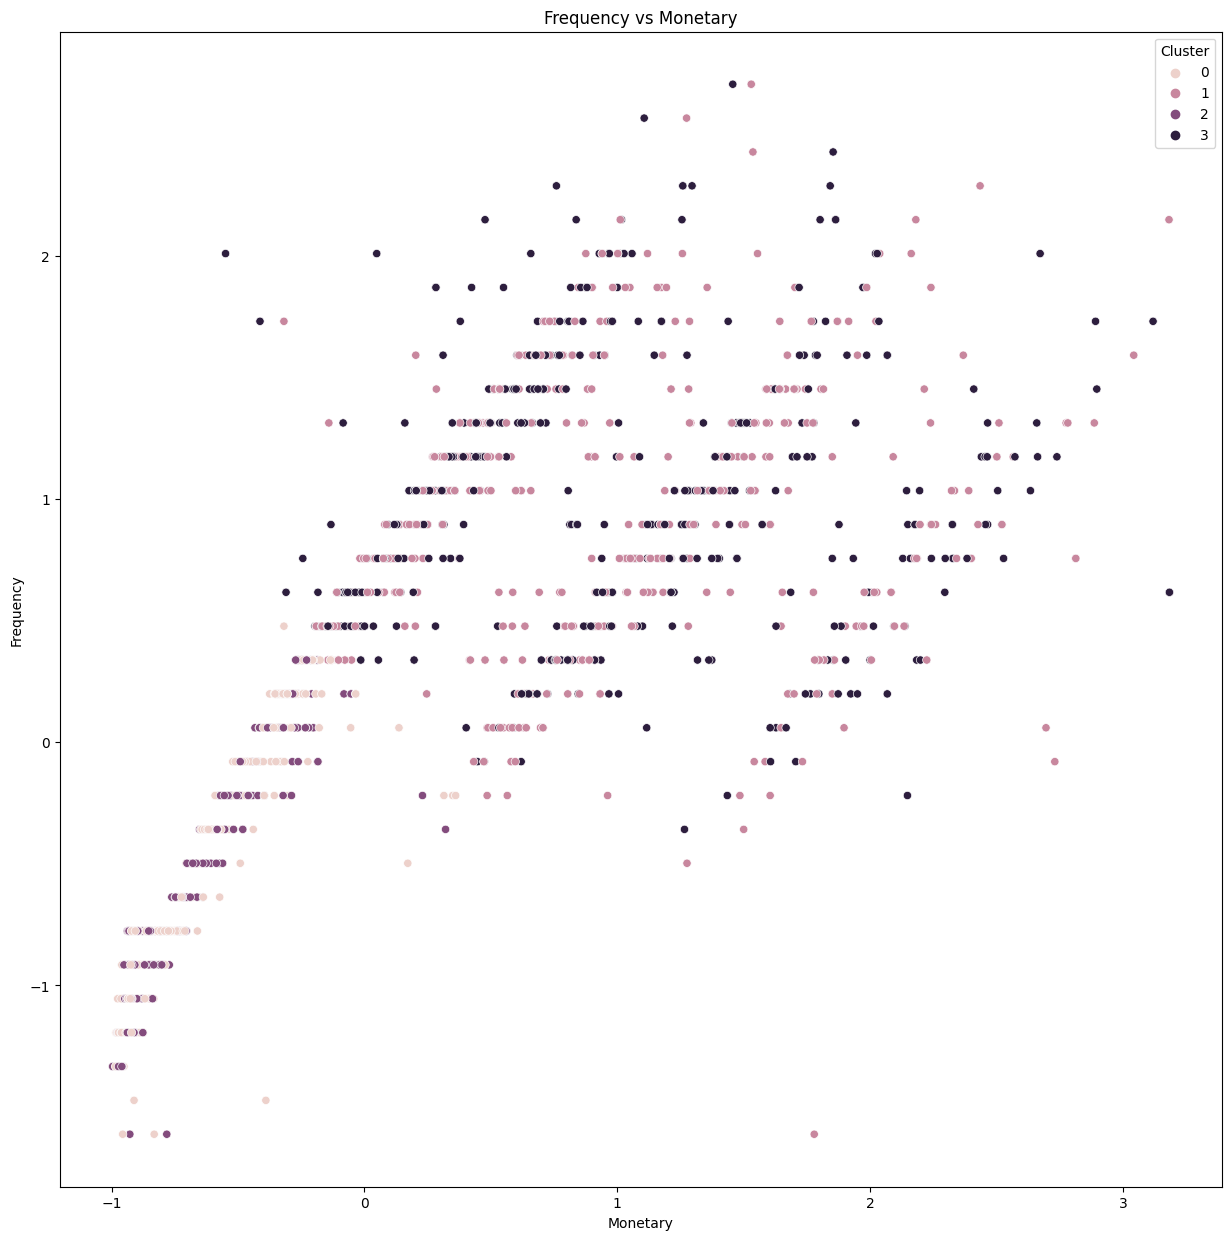

In [17]:
plt.title('Frequency vs Monetary')
sns.scatterplot(x=dfRFM_normalized['Monetary'],y=dfRFM_normalized['Frequency'],hue=dfRFM_normalized['Cluster'])

<Axes: title={'center': 'Recency vs Monetary'}, xlabel='Monetary', ylabel='Recency'>

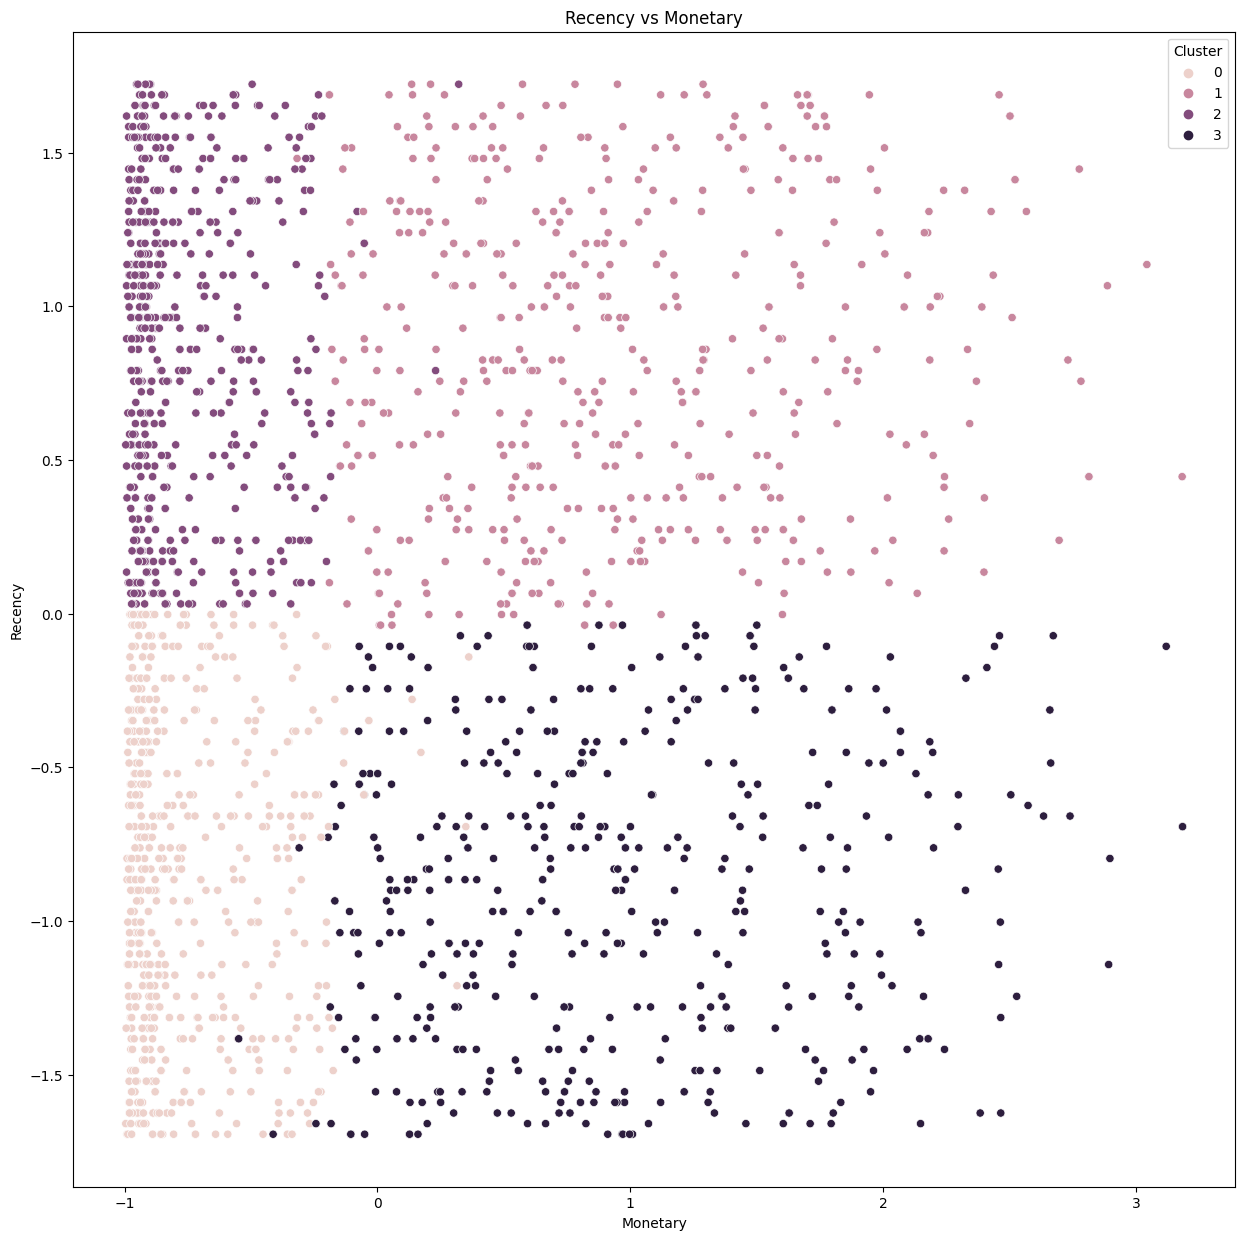

In [18]:
plt.title('Recency vs Monetary')
sns.scatterplot(x=dfRFM_normalized['Monetary'],y=dfRFM_normalized['Recency'],hue=dfRFM_normalized['Cluster'])

# Checking

In [19]:
value_map = {
    1 : 'High Value',
    2 : 'Promising',
    0 : 'Sleeping',
    3 : 'Lost' 
}

dfRFM_normalized['Cluster'].replace(value_map, inplace=True)

In [20]:
dfRFM_normalized['Cluster'].value_counts()

Cluster
Sleeping      640
Promising     603
High Value    524
Lost          466
Name: count, dtype: int64

# Conclusion

* Cluster from good to bad = 1 - 2 - 0 - 3
* As this data will group customer based on collected data and it will change whenever there are new data added, it's best used for supermarket yearly strategic planning (not continous).
* The basic customer segmentation performed in this project shows promising potential for more extensive analysis. Although time constraints and limited data prevented a comprehensive approach, there is scope to expand the segmentation to uncover deeper insights. Implementing this segmentation into real-time data could prove highly valuable for businesses and commerce companies in understanding their customers better. By delving into more advanced techniques and incorporating a larger dataset, we could reveal valuable patterns and trends to drive strategic decisions and tailor marketing efforts effectively. This extension has the potential to bring substantial benefits to the market and commerce sectors, paving the way for more targeted and personalized customer experiences.
* Astute advertisers recognize the importance of understanding their clients on a deeper level. Instead of solely chasing higher click-through rates, a shift in mindset is necessary. Rather than treating the entire customer base as a single entity, it is more strategic to divide them into distinct clusters, comprehending the unique characteristics of each group and tailoring relevant offers to engage them effectively. Among the widely acclaimed, user-friendly, and successful segmentation techniques empowering advertisers to analyze customer behavior is RFM (Recency, Frequency, Monetary) with K-Means segmentation. This method allows advertisers to gain valuable insights into customer preferences, facilitating more personalized and targeted marketing strategies.